# Graph diffusion applied to LBO

In [1]:
import nibabel as nib
import numpy as np

/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/nibabel/cifti2/parse_cifti2.py:24: FutureWarning: We no longer carry a copy of the 'six' package in nibabel; Please import the 'six' package directly
  from ..externals.six import BytesIO


In [2]:
res = nib.load('gradient_data/templates/hcp.tmp.lh.dscalar.nii').dataobj[:] # JG_MOD
cortL = np.squeeze(np.array(np.where(res != 0)[1], dtype=np.int32))

#res = nib.load('gradient_data/templates/hcp.tmp.rh.dscalar.nii').data

res = nib.load('gradient_data/templates/hcp.tmp.rh.dscalar.nii').dataobj[:] # JG_MOD
cortR = np.squeeze(np.array(np.where(res != 0)[1], dtype=np.int32))
cortLen = len(cortL) + len(cortR)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
import h5py, sys, io, numpy as np
import nibabel as nib 

#surfmL = nib.freesurfer.read_geometry('gradient_data/templates/S900.L.midthickness_MSMAll.32k_fs_LR.surf')
#surfiL = nib.freesurfer.read_geometry('gradient_data/templates/S900.L.very_inflated_MSMAll.32k_fs_LR.surf')
surfmL = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf') # JG_MOD
surfiL = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.L.very_inflated.32k_fs_LR.surf') # JG_MOD

surfL = []
surfL.append(np.array(surfmL[0]*0.3 + surfiL[0]*0.7))
surfL.append(surfmL[1])



#surfmR = nib.freesurfer.read_geometry('gradient_data/templates/S900.R.midthickness_MSMAll.32k_fs_LR.surf')
#surfiR = nib.freesurfer.read_geometry('gradient_data/templates/S900.R.very_inflated_MSMAll.32k_fs_LR.surf')
surfmR = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf') # JG_MOD
surfiR = nib.freesurfer.read_geometry('gradient_data/templates/Q1-Q6_R440.R.very_inflated.32k_fs_LR.surf') # JG_MOD
surfR = []
surfR.append(np.array(surfmR[0]*0.3 + surfiR[0]*0.7))
surfR.append(surfmR[1])

In [4]:
sulcL = np.zeros(len(surfL[0]))
sulcR = np.zeros(len(surfR[0]))
#sulcL[cortL] = -1 * nib.load('gradient_data/templates/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii').data[:len(cortL)]

thing = np.squeeze(nib.load('gradient_data/templates/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii').dataobj[:])
sulcL[cortL] = -1 * thing[:len(cortL)]


thing = np.squeeze(nib.load('gradient_data/templates/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii').dataobj[:])
sulcR[cortR] = -1 * thing[len(cortL)::]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [5]:
#nib.load('gradient_data/templates/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii').dataobj[:len(cortL)]
#sulcR[cortR] = -1 * nib.load('gradient_data/templates/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii').data[len(cortL)::]
#sulcR[cortR] = -1 * nib.load('gradient_data/templates/S900.sulc_MSMAll.32k_fs_LR.dscalar.nii').dataobj[len(cortL)::]
#sulcL[np.setdiff1d(range(32492),cortL)] = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[np.setdiff1d(range(32492),cortL)]
#sulcR[np.setdiff1d(range(32492),cortR)] = -1 * nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').data[32492+np.setdiff1d(range(32492),cortR)]

thing = np.squeeze(nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').dataobj[:])
sulcL[np.setdiff1d(range(32492),cortL)] = -1 * thing[np.setdiff1d(range(32492),cortL)]

thing = np.squeeze(nib.load('gradient_data/templates/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').dataobj[:])
sulcR[np.setdiff1d(range(32492),cortR)] = -1 * thing[32492+np.setdiff1d(range(32492),cortR)]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [ ]:
%matplotlib inline
from nilearn.plotting import plot_surf_stat_map,plot_surf,plot_surf_roi

from nilearn.plotting.surf_plotting import load_surf_mesh

In [7]:
from matplotlib import pyplot as plt


In [10]:
sys.path.append('/home/hpc3230/Code/libraries_of_others/github/mindboggle')

In [11]:
from mindboggle.shapes.laplace_beltrami import computeAB

In [12]:
import scipy

In [13]:
A,B = computeAB(surfiL[0],surfiL[1])

A = scipy.sparse.csc_matrix(A)

In [ ]:
t = 5

thing = scipy.sparse.linalg.expm(A*t)

In [ ]:
Lambda = thing

In [ ]:
Lambda_evals,Lambda_evecs = scipy.sparse.linalg.eigsh(Lambda)

In [ ]:
# should correlate this with the FC matrix

In [ ]:
# ...another big operation...

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         Lambda_evecs[:,1],
                         bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap=mymap);

In [ ]:
def compute_forward_model(SC,FC=None,):
    """
    Usage:

    A,C = compute_forward_model(SC)
    
    A,C,fullcorr,trilcorr = compute_forward_model(SC,FC)
    
    """
    
    #SC_norm = SC / SC.max()
    SC_norm = SC
    I = np.eye(SC.shape[0])
    
    #% Calculating proportional factor 'c'
    #c1 = 1./ max(np.linalg.eig(SC)[0]); #% Critical point
    c1 = 1./ max(scipy.sparse.linalg.eigs(SC)[0])[0]; #% Critical point
    
    c = 0.87 * c1; #% The factor 0.87 is the near critical point. The factor is taken from the past papers on stability analysis using EEG data. For details and references, see above mentioned paper.   

    #% Assumming deCM proportional to aCM 
    CIJ0 = c * SC #aCM; 
    
    #A = inv(I-SC_norm)
    #% Calculating transfer function
    A = np.linalg.inv(I - CIJ0);

    #% Computing fCM (i.e. Corelation matrix)
    Ccorr = np.corrcoef(A);
    Ccov = np.dot(A,A.T)# A.T,A)#,A.T)
    
    
    
    if FC is not None:

        fullcorrSC = np.corrcoef(SC.ravel(),FC.ravel())[0,1]
        trilcorrSC = np.corrcoef(np.tril(SC,-1).ravel(),np.tril(FC,-1).ravel())[0,1]
        
        fullcorrA = np.corrcoef(A.ravel(),FC.ravel())[0,1]
        trilcorrA = np.corrcoef(np.tril(A,-1).ravel(),np.tril(FC,-1).ravel())[0,1]
    
        fullcorrCcorr = np.corrcoef(Ccorr.ravel(),FC.ravel())[0,1]
        trilcorrCcorr = np.corrcoef(np.tril(Ccorr,-1).ravel(),np.tril(FC,-1).ravel())[0,1]
        
        fullcorrCcov =np.corrcoef(Ccov.ravel(),FC.ravel())[0,1]
        trilcorrCcov = np.corrcoef(np.tril(Ccov,-1).ravel(),np.tril(FC,-1).ravel())[0,1]
        
        
        corrs = np.array([fullcorrSC,trilcorrSC,fullcorrA,trilcorrA,fullcorrCcorr,trilcorrCcorr,fullcorrCcov,trilcorrCcov])
        corrs_names = ['fullcorrSC', 'trilcorrSC','fullcorrA','trilcorrA','fullcorrCcorr', 'trilcorrCcorr', 'fullcorrCcov', 'trilcorrCcov']
        
        normSC = np.linalg.norm(FC - SC) / np.linalg.norm(FC)
        normA = np.linalg.norm(FC - A) / np.linalg.norm(FC)
        normCcorr = np.linalg.norm(FC - Ccorr) / np.linalg.norm(FC)
        normCcov = np.linalg.norm(FC - Ccov) / np.linalg.norm(FC)

        norms = np.array([normSC,normA,normCcorr,normCcov])
        norms_names = ['normSC', 'normA', 'normCcorr', 'normCcov']
        
        fits_dict = {}
        for k,v in zip(corrs_names,corrs): fits_dict[k] = v
        for k,v in zip(norms_names,norms): fits_dict[k] = v
        
        return A,Ccorr,Ccov,fits_dict
    
    else:
        
      return A,Ccorr,Ccov
    
    

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],Lamba[:,1],bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap=mymap);

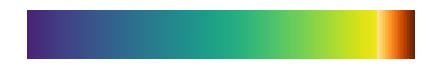

In [8]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('nipy_spectral')
new_cmap = truncate_colormap(cmap, 0.2, 0.95)

#colors1 = plt.cm.YlGnBu(np.linspace(0, 1, 128))
first = int((128*2)-np.round(255*(1.-0.90)))
second = (256-first)
#colors2 = new_cmap(np.linspace(0, 1, first))
colors2 = plt.cm.viridis(np.linspace(0.1, .98, first))
colors3 = plt.cm.YlOrBr(np.linspace(0.25, 1, second))
colors4 = plt.cm.PuBu(np.linspace(0., 0.5, second))
#colors4 = plt.cm.pink(np.linspace(0.9, 1., second))
# combine them and build a new colormap
cols = np.vstack((colors2,colors3))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', cols)

num = 256
gradient = range(num)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=mymap, interpolation='nearest')
ax.set_axis_off()
fig.tight_layout()

plt.show()

In [184]:
f = 'gradient_data/embedded/ciftis/hcp.embed.dscalar.nii'

emb_img = nib.load(f)
emb_dat = np.squeeze(emb_img.get_data()).T



dataL = np.zeros([len(surfL[0]),emb_dat.shape[1]])
dataL[cortL,:] = emb_dat[0:len(cortL),:]



dataR = np.zeros([len(surfR[0]),emb_dat.shape[1]])
dataR[cortR,:] = emb_dat[len(cortL):cortLen,:]

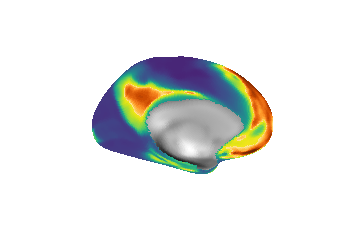

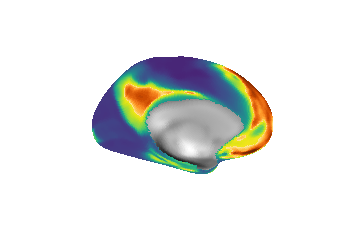

In [185]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL[:,0],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap=mymap);

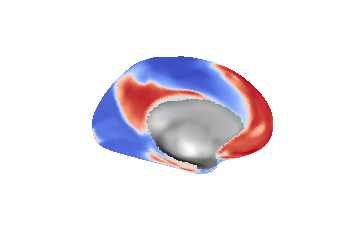

In [187]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL[:,0],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral');

In [190]:
plot_surf_stat_map??

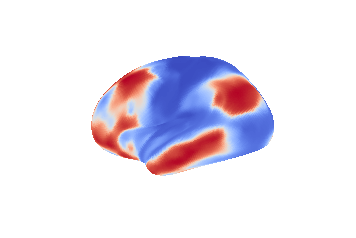

In [191]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL[:,0],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

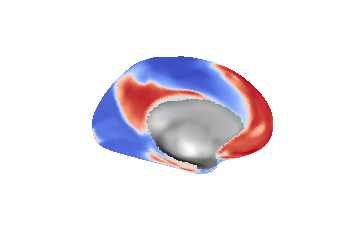

In [192]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL[:,0],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

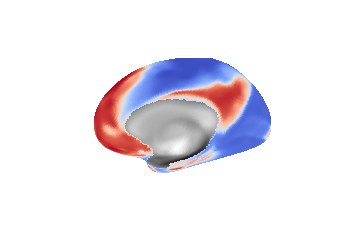

In [195]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR[:,0],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

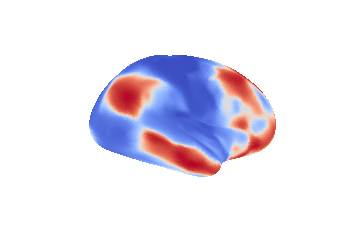

In [194]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR[:,0],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');

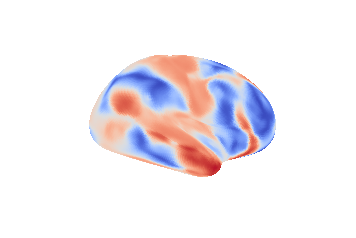

In [200]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR[:,1],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');

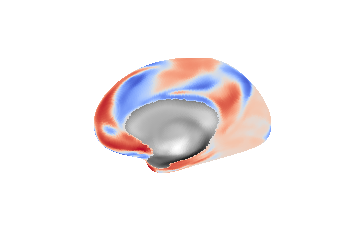

In [201]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR[:,1],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

In [204]:
thing = np.load('gradient_data/conn_matrices/dcon_evecs.npy')

In [206]:
dcon_first10evecs = thing[:,:10]

In [208]:
np.save('gradient_data/conn_matrices/dcon_first10evecs.npy', dcon_first10evecs)

In [11]:
dcon_first10evecs = np.load('gradient_data/conn_matrices/dcon_first10evecs.npy')

In [12]:
dataL_dcon = np.zeros([len(surfL[0]),dcon_first10evecs.shape[1]])
dataL_dcon[cortL,:] = dcon_first10evecs[0:len(cortL),:]

dataR_dcon = np.zeros([len(surfR[0]),dcon_first10evecs.shape[1]])
dataR_dcon[cortR,:] = dcon_first10evecs[len(cortL):cortLen,:]

/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


In [15]:
dataR_d

(32492, 10)

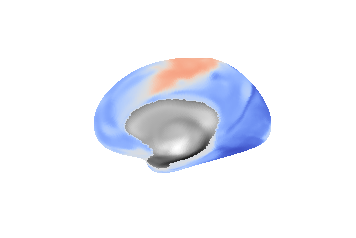

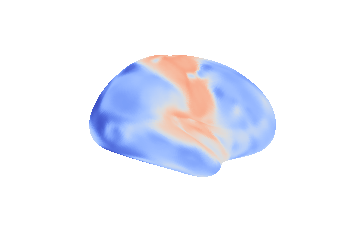

In [24]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,1],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,1],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');

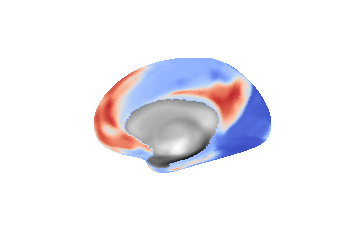

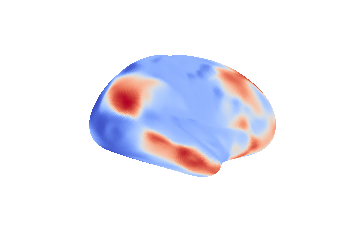

In [25]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,2],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,2],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');

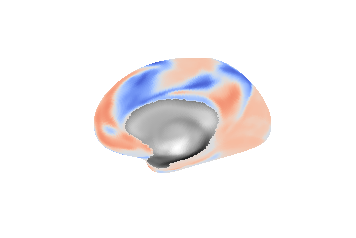

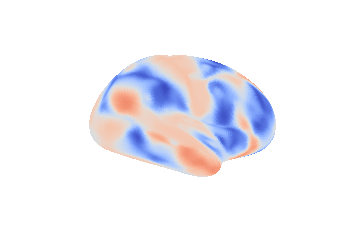

In [26]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,3],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,3],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');

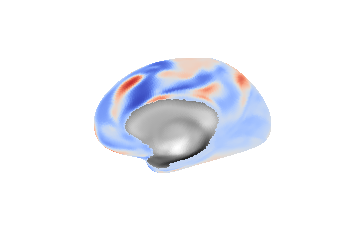

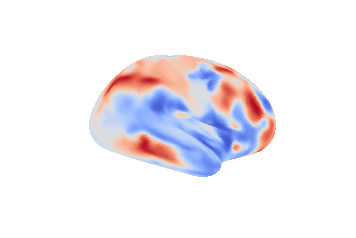

In [27]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,4],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,4],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');

In [28]:
thing = np.load('gradient_data/conn_matrices/cosine_affinity.npy')

aff_evals,aff_evecs = scipy.sparse.linalg.eigs(thing)

np.save('gradient_data/conn_matrices/cosine_affinity_evecs.npy', aff_evecs)

(91282, 6)

In [ ]:
# save first 10

In [ ]:
# ...plot on brain
# ...are they different to the dcon evecs?

In [38]:
# get left hemisphere evecs

In [9]:
f = '/scratch/hpc3230/Data/connectomeDB/HCP_S900_820_rfMRI_MSMAll_groupPCA_d4500ROW_zcorr.dconn.nii'
img = nib.load(f)
dcondat = img.get_data()

In [ ]:
dcondat_pc90 = np.zeros_like(dcondat)

# Generate percentile thresholds for 90th percentile
perc = np.array([np.percentile(x, 90) for x in dcondat])

# Threshold each row of the matrix by setting values below 90th percentile to 0
for i in range(dcondat.shape[0]):
  # print "Row %d" % i
  dcondat_pc90[i, dcondat[i,:] < perc[i]] = 0    

In [ ]:
f = '/scratch/hpc3230/Data/connectomeDB/dcondat_pc90.npy'
np.save(f, dcondat_pc90)

In [10]:
dcondat.shape

(91282, 91282)

In [11]:
cortL.shape

(29696,)

In [20]:
import scipy

In [12]:
dcondat_L = dcondat[cortL,:]#[:,cortL]

dcondat_L = dcondat_L[:,cortL]

f = '/scratch/hpc3230/Data/connectomeDB/HCP_S900_820_rfMRI_MSMAll_groupPCA_d4500ROW_zcorr.dconn__cortL_dat.npy'

np.save(f, dcondat_L)

In [ ]:
decondat_L_evals,decondat_L_evecs = scipy.sparse.linalg.eigs(dcondat_L_) 

In [18]:
dcondat_L_pc90 = dcondat_L.copy() # np.zeros_like(dcondat_L)

# Generate percentile thresholds for 90th percentile
perc = np.array([np.percentile(x, 90) for x in dcondat_L])

# Threshold each row of the matrix by setting values below 90th percentile to 0
for i in range(dcondat_L.shape[0]):
  # print "Row %d" % i
  dcondat_L_pc90[i, dcondat_L[i,:] < perc[i]] = 0    

In [49]:
decondat_L_pc90_evals,decondat_L_pc90_evecs = np.linalg.eig(dcondat_L_pc90) 

In [21]:
dcondat_L_pc90_csr = scipy.sparse.csr_matrix(dcondat_L_pc90)

In [ ]:
decondat_L_pc90_csr_evals,decondat_L_pc90_csr_evecs = scipy.sparse.linalg.eigs(dcondat_L_pc90_csr) 

In [38]:
decondat_L_pc90_csr_evecs.shape

(29696, 6)

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         decondat_L_pc90_csr_evecs[:,1],
                         bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         decondat_L_pc90_csr_evecs[:,1],
                         bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         decondat_L_pc90_csr_evecs[:,2],
                         bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         decondat_L_pc90_csr_evecs[:,2],
                         bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         decondat_L_pc90_csr_evecs[:,3],
                         bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

In [ ]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         decondat_L_pc90_csr_evecs[:,3],
                         bg_map=sulcL,darkness=1,
                         bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

In [39]:
#evals,evecs = sparse.linalg.eigs(dcondat_L)
#dcondat[0:len(cortL])])

In [41]:
dataL_decondat_L_pc90_csr_evecs = np.zeros([len(surfL[0]),6])# len(surfL[0])])#dcon_first10evecs.shape[1]])
dataL_decondat_L_pc90_csr_evecs[cortL,:6] = decondat_L_pc90_csr_evecs[:,:6].astype(float)

/home/hpc3230/Software/anaconda2/envs/tvb/lib/python2.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [50]:
dataL_decondat_L_pc90_evecs = np.zeros([len(surfL[0]),6])# len(surfL[0])])#dcon_first10evecs.shape[1]])
dataL_decondat_L_pc90_evecs[cortL,:6] = decondat_L_pc90_evecs[:,:6].astype(float)

In [55]:
dcondat_L_pc90.max()

0.0

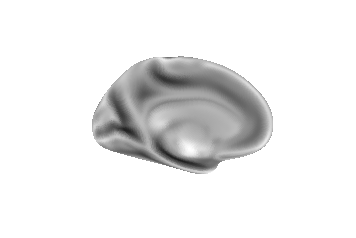

In [51]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         dataL_decondat_L_pc90_evecs[:,1],
                         bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

In [ ]:
#dcondat[dcondat==np.inf] == 0

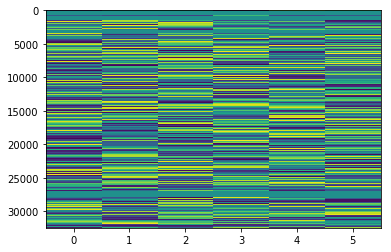

In [47]:
plt.imshow(dataL_decondat_L_pc90_csr_evecs,aspect='auto')

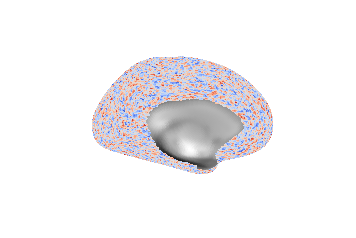

In [42]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         dataL_decondat_L_pc90_csr_evecs[:,1],
                         bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

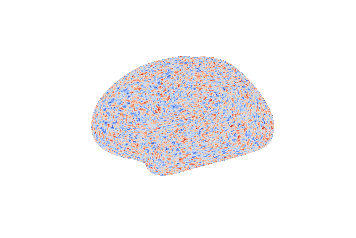

In [43]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],
                         dataL_decondat_L_pc90_csr_evecs[:,1],
                         bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

In [12]:
dataL_dcondat = np.zeros([len(surfL[0]),len(surfL[0])])#dcon_first10evecs.shape[1]])
dataL_dcondat[cortL,:][:,cortL] = dcondat[0:len(cortL),0:len(cortL)]

dataR_dcondat = np.zeros([len(surfR[0]),len(surfR[0])])#dcon_first10evecs.shape[1]])
dataR_dcondat[cortR,:][:,cortR] = dcondat[len(cortL):cortLen,:][:,len(cortL):cortLen]

In [13]:
dataL_dcondat_evals,dataL_dcondat_evecs = np.linalg.eig(dataL_dcondat)

In [20]:
dataL_dcondat.max()

0.0

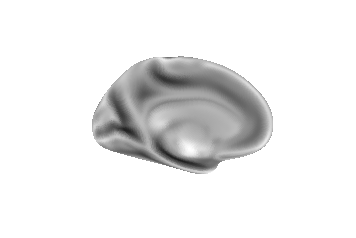

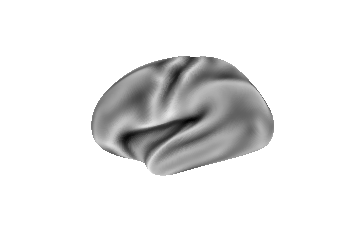

In [14]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL_dcondat_evecs[:,1],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL_dcondat_evecs[:,1],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

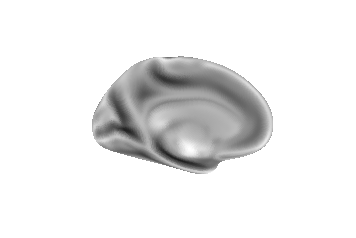

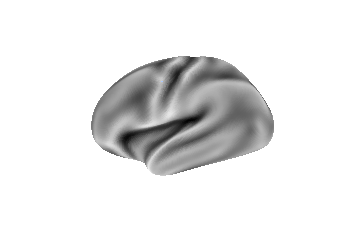

In [15]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL_dcondat_evecs[:,2],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL_dcondat_evecs[:,2],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

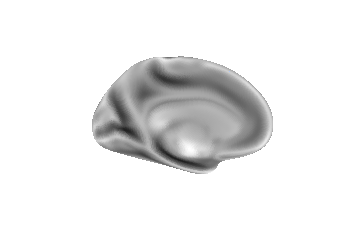

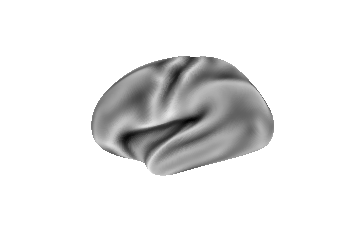

In [16]:
res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL_dcondat_evecs[:,3],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='left');

res = plot_surf_stat_map([surfiL[0],surfiL[1]],dataL_dcondat_evecs[:,3],bg_map=sulcL,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='left');

In [ ]:
dataR_dcondat_evals,dataR_dcondat_evecs = np.linalg.eig(dataR_dcondat)

In [ ]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcondat_evecs[:,1],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcondat_evecs[:,1],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');

In [ ]:
import numpy as np
import nibabel as nib # git clone --branch enh/cifti2 https://github.com/satra/nibabel.git
from sklearn.metrics import pairwise_distances

# Load data and Fisher's z-to-r transform
#
f = '/scratch/hpc3230/Data/connectomeDB/HCP_S900_820_rfMRI_MSMAll_groupPCA_d4500ROW_zcorr.dconn.nii'

#dcon = np.tanh(nib.load('HCP_S900_820_rfMRI_MSMAll_groupPCA_d4500ROW_zcorr.dconn.nii').data)

dcon = np.tanh(np.squeeze(nib.load(f).get_data()))

# Get number of nodes
N = dcon.shape[0]

# Generate percentile thresholds for 90th percentile
perc = np.array([np.percentile(x, 90) for x in dcon])

# Threshold each row of the matrix by setting values below 90th percentile to 0
for i in range(dcon.shape[0]):
  print "Row %d" % i
  dcon[i, dcon[i,:] < perc[i]] = 0    

# In[ ]:


# Check for minimum value
print "Minimum value is %f" % dcon.min()

# The negative values are very small, but we need to know how many nodes have negative values
# Count negative values per row
neg_values = np.array([sum(dcon[i,:] < 0) for i in range(N)])
print "Negative values occur in %d rows" % sum(neg_values > 0)

# Since there are only 23 vertices with total of 5000 very small negative values, we set these to zero
dcon[dcon < 0] = 0


# In[ ]:

In [ ]:
res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,2],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

res = plot_surf_stat_map([surfiR[0],surfiR[1]],dataR_dcon[:,2],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');


In [ ]:
res = plot_surf_stat_map([surfiR[0],surfiR[3]],dataR_dcon[:,2],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='lateral',hemi='right');

res = plot_surf_stat_map([surfiR[0],surfiR[3]],dataR_dcon[:,2],bg_map=sulcR,darkness=1,
                   bg_scaling_factor=1.5,cmap='coolwarm',view='medial',hemi='right');


In [196]:
emb_dat.shape

(91282, 26)

In [198]:
plt.imshow??

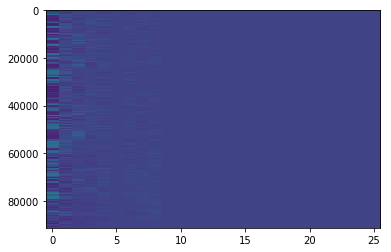

In [199]:
plt.imshow(emb_dat,aspect='auto')

In [ ]:
for i in range(5):
    showSurf(dataL[:,i].squeeze(), surfL, sulcL, cortL, showall=True, output_file='gradient_data/figures/embedded/fig.hcp.embed.%i.L' % i, symmetric_cbar = False,
                        cmap=mymap, bg_scaling_factor=1.5)
    showSurf(dataR[:,i].squeeze(), surfR, sulcR, cortR, showall=True, output_file='gradient_data/figures/embedded/fig.hcp.embed.%i.R' % i, symmetric_cbar = False,
                        cmap=mymap, bg_scaling_factor=1.5)        